In [3]:

#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from numpy import sqrt


if keras.backend.backend() == 'tensorflow':
    from keras import backend as K
    import tensorflow as tf
    from keras.utils.conv_utils import convert_kernel
    
    
########### Normalisieren ###########

#Ist schon normalisiert

Using TensorFlow backend.


# Load Data

In [4]:
### timeflipped 

X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/pickle/Final/X_DSNB_tf_globalnorm_PMT_Norm_PMT160andLAPPD5x5_180k_files_50_50_balanced.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/pickle/Final/Y_DSNB_tf_globalnorm_PMT_Norm_PMT160andLAPPD5x5_180k_files_50_50_balanced.pickle","rb"))

In [5]:

########### Daten laden ###########
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
#XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/MRD_new.npy")
ParentE= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/Final/EnergyMother.npy")
MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/Final/EnergyMuon.npy",allow_pickle=True)
EE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/Final/EnergyElectron.npy",allow_pickle=True)
VisibleE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/Final/VisibleEnergy.npy",allow_pickle=True)

# Def Confusion Matrix

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Merge Data

In [13]:
counter

73971

In [5]:

training_data = list(zip(X, Y,VisibleE,ParentE))

random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]
XMRD1=[]
VisibleE1=[]
ParentE1=[]

for x in training_data[:135000]:
    if x[2][0] > 70 and x[2][0]<180:
        X1.append(x[0])
        Y1.append(x[1])
        #XMRD1.append(x[2])
        VisibleE1.append(x[2])
        ParentE1.append(x[3])
    
XTraining = np.array(X1)
YTraining = np.array(Y1)
#XMRDTraining= np.array(XMRD1)
VisibleETraining=np.array(VisibleE1)
ParentETraining=np.array(ParentE1)


X2 =[]
Y2 =[]
#XMRD2=[]
VisibleE2=[]
ParentE2=[]


for x in training_data[135000:160000]:
    if x[2][0] > 70 and x[2][0]<180:
        X2.append(x[0])
        Y2.append(x[1])
        #XMRD2.append(x[2])
        VisibleE2.append(x[2])
        ParentE2.append(x[3])
    
XVal = np.array(X2)
YVal = np.array(Y2)
#XMRDVal=np.array(XMRD2)
VisibleEVal=np.array(VisibleE2)
ParentEVal=np.array(ParentE2)

X3 =[]
Y3 =[]
#XMRD3=[]
VisibleE3=[]
ParentE3=[]

for x in training_data[160000:]:
    if x[2][0] > 70 and x[2][0]<180:    
        X3.append(x[0])
        Y3.append(x[1])
        #XMRD3.append(x[2])
        VisibleE3.append(x[2])
        ParentE3.append(x[3])
    
XTest = np.array(X3)
YTest = np.array(Y3)
#XMRDTest=np.array(XMRD3)
VisibleETest=np.array(VisibleE3)
ParentETest=np.array(ParentE3)

print(XTraining.shape,XVal.shape,XTest.shape)
print(XTest.shape,YTest.shape,VisibleETest.shape,ParentETest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3,XMRD3,XMRD2,XMRD1,ParentE1,ParentE2,ParentE3,VisibleE3,VisibleE2,VisibleE1

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(53786, 50, 120, 2) (9974, 50, 120, 2) (10211, 50, 120, 2)


NameError: name 'XMRDTest' is not defined

In [6]:
del X,Y,X1,X2,X3,Y1,Y2,Y3,,XMRD2,XMRD1,ParentE1,ParentE2,ParentE3,VisibleE3,VisibleE2,VisibleE1

NameError: name 'XMRD3' is not defined

In [17]:
print(XTest.shape,YTest.shape,VisibleETest.shape,ParentETest.shape)

(10300, 50, 120, 2) (10300, 2) (10300, 2) (10300,)


# Safe Testdata

In [7]:
from datetime import datetime
now = datetime.now()
pickle_out = open("pickle/Final/X_Test_{}.pickle".format(now.strftime("%m.%d.%Y")),"wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("pickle/Final/VisibleE_Test_{}.pickle".format(now.strftime("%m.%d.%Y")),"wb")
pickle.dump(VisibleETest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("pickle/Final/Y_Test_{}.pickle".format(now.strftime("%m.%d.%Y")),"wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("pickle/Final/ParentE_Test_{}.pickle".format(now.strftime("%m.%d.%Y")),"wb")
pickle.dump(ParentETest,pickle_out,protocol=4)
pickle_out.close()

06.07. Files for Björn

07.07 Files for Thesis

# Load Data Safed data

In [6]:
### timeflipped 

X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/pickle/Final/X_Test_07.26.2020.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/pickle/Final/Y_Test_07.26.2020.pickle","rb"))#Y_Beamlike_PID_globalnorm_PMT160andLAPPD5x5_timeflipped_120k_Files_mitTopBottom.pickle","rb"))

In [15]:

########### Daten laden ###########
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
#XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/MRD_new.npy")
#ParentE= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/EnergyMother.npy")
#MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/Temp/EnergyMuon.npy",allow_pickle=True)
#EE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/DSNB/EnergyElectron.npy",allow_pickle=True)
VisibleE=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/DSNB/pickle/Final/VisibleE_Test_07.26.2020.pickle","rb"))

# Train a Model

W0726 02:40:57.502779 17672 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 02:40:58.189952 17672 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 120, 100)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 120, 100)      90100     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 60, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 60, 100)       90100     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 60, 100)       9

Epoch 15/32
53700/53786 [============================>.] - ETA: 0s - loss: 0.0772 - acc: 0.9680
Epoch 00015: val_acc did not improve from 0.95970
53786/53786 [==============================] - 51s 945us/sample - loss: 0.0774 - acc: 0.9679 - val_loss: 0.1538 - val_acc: 0.9356
Epoch 16/32
53700/53786 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9694
Epoch 00016: val_acc did not improve from 0.95970
53786/53786 [==============================] - 50s 928us/sample - loss: 0.0754 - acc: 0.9694 - val_loss: 0.1217 - val_acc: 0.9340
Epoch 17/32
53700/53786 [============================>.] - ETA: 0s - loss: 0.0721 - acc: 0.9692
Epoch 00017: val_acc did not improve from 0.95970
53786/53786 [==============================] - 49s 907us/sample - loss: 0.0721 - acc: 0.9692 - val_loss: 0.1328 - val_acc: 0.9561
Epoch 18/32
53700/53786 [============================>.] - ETA: 0s - loss: 0.0699 - acc: 0.9710
Epoch 00018: val_acc did not improve from 0.95970
53786/53786 [=============

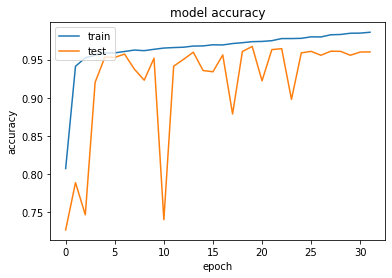

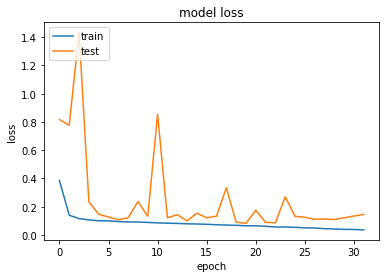

Ende des Versuchs: 


In [8]:
###### TIME FLIPPED
dense_layers = [1]
layer_sizes = [100]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTplusLAPPD_CNN\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))    
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN_PMT+LAPPD(5x5)_window_tf_PID_70k_tf-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,YVal)   
                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 32)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [20]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_window_tf_PID_70k_tf-improvement-val-acc_0.97.model")

W0728 03:02:54.582705 15496 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0728 03:02:54.582705 15496 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0728 03:02:54.582705 15496 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared

In [58]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest,batch_size=100, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6215  125]
 [ 238 3633]]


[[0.98028391 0.01971609]
 [0.06148282 0.93851718]]


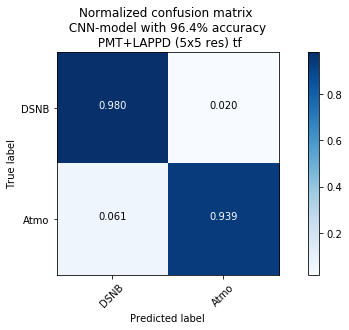

In [61]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["DSNB", "Atmo"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 96.4% accuracy \n PMT+LAPPD (5x5 res) tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [10]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.09042928155995748
Test accuracy:  0.9644501


In [11]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest,batch_size=100, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[6215  125]
 [ 238 3633]]


[[0.98028391 0.01971609]
 [0.06148282 0.93851718]]


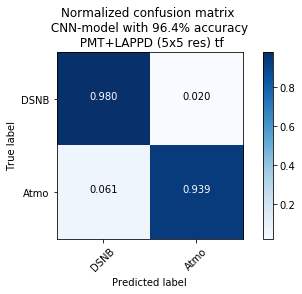

In [13]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["DSNB", "Atmo"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 96.4% accuracy \n PMT+LAPPD (5x5 res) tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [18]:
unique, counts = np.unique(YTest, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])


NameError: name 'YTest' is not defined

# Feature Map

In [22]:
feature_maps = model.predict(XTest)

In [21]:
XTest=X
YTest=Y
VisibleETest=VisibleE

# Visible Energy vs Accurancy

In [23]:
colorSR=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
colorMR=(1, 0.5176470588235295, 0.3215686274509804)

In [24]:
ViEnMuon=[]
ViEnEl=[]

for event in range(len(YTest)):
    if YTest[event,0] >0.5:
        ViEnMuon.append((VisibleETest[event]))

    if YTest[event,1] >0.5:
        ViEnEl.append((VisibleETest[event]))

ViEnMuon=np.array(ViEnMuon)
ViEnEl=np.array(ViEnEl)

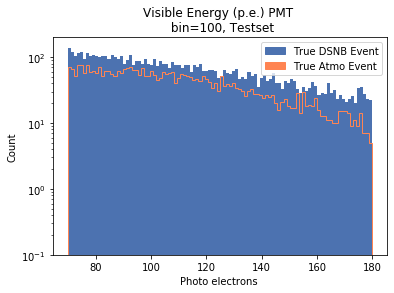

In [25]:
#### PMT Photoelectorns 
plt.hist(ViEnMuon[:,0], bins=100,histtype='stepfilled',log=True,color=colorSR)
plt.hist(ViEnEl[:,0], bins=100 , histtype='step',log=True,color=colorMR)
plt.title("Visible Energy (p.e.) PMT \n bin=100, Testset")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True DSNB Event')
blue_patch = mpatches.Patch(color=colorMR, label='True Atmo Event')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


plt.show()

Nun alle

In [21]:
max(VisibleE[50000:,0])

25079.2

In [22]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])


NameError: name 'Y' is not defined

In [26]:
ViEnMuon=[]
ViEnEl=[]

for event in range(len(YTest)):
    if YTest[event,0] >0.5:
        ViEnEl.append(VisibleETest[event])

    if YTest[event,1] >0.5:
        ViEnMuon.append(VisibleETest[event])

ViEnMuon=np.array(ViEnMuon)
ViEnEl=np.array(ViEnEl)

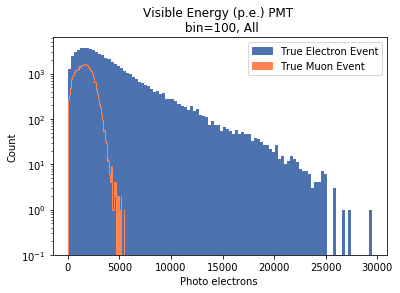

In [38]:
#### PMT Photoelectorns 
plt.hist(VisibleE[:60028,0], bins=100,histtype='stepfilled',log=True,color=colorSR)
plt.hist(VisibleE[60028:,0], bins=100 , histtype='step',log=True,color=colorMR)
plt.title("Visible Energy (p.e.) PMT \n bin=100, All")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True Electron Event')
blue_patch = mpatches.Patch(color=colorMR, label='True Muon Event')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


plt.show()

In [39]:
len(ViEnMuon),len(ViEnEl)

(7412, 7593)

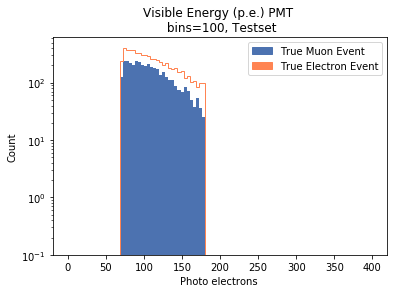

In [27]:
#### PMT Photoelectorns 
plt.hist(ViEnMuon[:,0],range=(0,400), bins=100,histtype='stepfilled',log=True,color=colorSR)
plt.hist(ViEnEl[:,0], bins=100 ,range=(0,400), histtype='step',log=True,color=colorMR)
plt.title("Visible Energy (p.e.) PMT \n bins=100, Testset")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True Muon Event')
blue_patch = mpatches.Patch(color=colorMR, label='True Electron Event')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


plt.show()

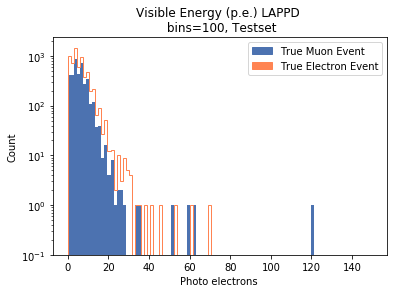

In [30]:
### LAPPD

plt.hist(ViEnMuon[:,1],range=(0,150), bins=100,histtype='stepfilled',log=True,color=colorSR)
plt.hist(ViEnEl[:,1], bins=100 ,range=(0,150), histtype='step',log=True,color=colorMR)
plt.title("Visible Energy (p.e.) LAPPD \n bins=100, Testset")
plt.xlabel("Photo electrons ")
plt.ylabel("Count")
plt.grid(False)

red_patch = mpatches.Patch(color=colorSR, label='True Muon Event')
blue_patch = mpatches.Patch(color=colorMR, label='True Electron Event')


plt.legend(handles=[red_patch, blue_patch],loc='upper right')


plt.show()

## Nun mit Acc

In [31]:
VisiblePMTEnergy=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0

for event in range(len(feature_maps)):
    if YTest[event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisiblePMTEnergy.append((float(VisibleETest[event,0]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisiblePMTEnergy=np.array(VisiblePMTEnergy)

In [32]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisiblePMTEnergy)):

    if VisiblePMTEnergy[event,0]<=80 and VisiblePMTEnergy[event,1]>0.5:
        Bin100 = Bin100+1
    if VisiblePMTEnergy[event,0]<=80:
         pi1=pi1+1
        
    if 80<=VisiblePMTEnergy[event,0]<=100 and VisiblePMTEnergy[event,1]>0.5:
         Bin200 = Bin200+1
    if 80<=VisiblePMTEnergy[event,0]<=100:
         pi2=pi2+1
        
    if 100<=VisiblePMTEnergy[event,0]<=120 and VisiblePMTEnergy[event,1]>0.5:
        Bin300 = Bin300+1
    if 100<=VisiblePMTEnergy[event,0]<=120:
        pi3=pi3+1
  
    if 120<=VisiblePMTEnergy[event,0]<=140 and VisiblePMTEnergy[event,1]>0.5:
        Bin400 = Bin400+1
    if 120<=VisiblePMTEnergy[event,0]<=140:
        pi4=pi4+1
        
    if 140<=VisiblePMTEnergy[event,0]<=160 and VisiblePMTEnergy[event,1]>0.5:
        Bin500 = Bin500+1
    if 140<=VisiblePMTEnergy[event,0]<=160:
        pi5=pi5+1
        
    if 160<=VisiblePMTEnergy[event,0]<=180 and VisiblePMTEnergy[event,1]>0.5:
        Bin600 = Bin600+1
    if 160<=VisiblePMTEnergy[event,0]<=180:
        pi6=pi6+1
        
    if 1200<=VisiblePMTEnergy[event,0]<=1800 and VisiblePMTEnergy[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisiblePMTEnergy[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisiblePMTEnergy[event,0]<=2500 and VisiblePMTEnergy[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisiblePMTEnergy[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisiblePMTEnergy[event,0]<=5000 and VisiblePMTEnergy[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisiblePMTEnergy[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisiblePMTEnergy[event,0]<=10000 and VisiblePMTEnergy[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisiblePMTEnergy[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisiblePMTEnergy[event,0]<=15000 and VisiblePMTEnergy[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisiblePMTEnergy[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisiblePMTEnergy[event,0]<=20000 and VisiblePMTEnergy[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisiblePMTEnergy[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisiblePMTEnergy[event,0]<=80000 and VisiblePMTEnergy[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisiblePMTEnergy[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisiblePMTEnergy[event,0]<=4000 and VisiblePMTEnergy[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisiblePMTEnergy[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisiblePMTEnergy[event,0]<=8000 and VisiblePMTEnergy[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisiblePMTEnergy[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

VisiblePMTEnergy_AccMR=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6]#,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10]
VisiblePMTEnergy_AccMRError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6))#1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10))

errorVisiblePMTEnergyMR=[]
for i in range(6):
    errorVisiblePMTEnergyMR.append(VisiblePMTEnergy_AccMRError[i]* VisiblePMTEnergy_AccMR[i])

     

605 1093 940 639 389 205 0 0 0 0 0 0 0 0 0


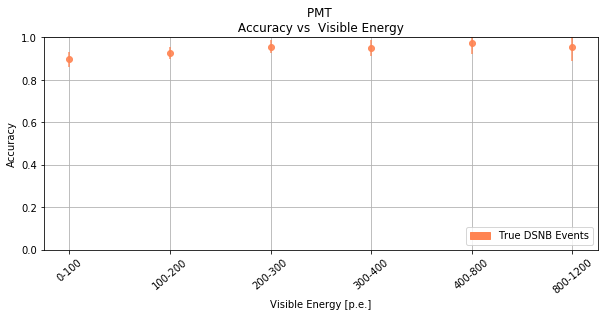

In [33]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,6)

axs=plt.errorbar(x, VisiblePMTEnergy_AccMR[:11],errorVisiblePMTEnergyMR[:11],c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True DSNB Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('PMT \n Accuracy vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [34]:
VisibleLAPPDEnergy=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisibleLAPPDEnergy.append((float(VisibleETest[event,1]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisibleLAPPDEnergy=np.array(VisibleLAPPDEnergy)

In [35]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisibleLAPPDEnergy)):

    if VisibleLAPPDEnergy[event,0]<=20 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin100 = Bin100+1
    if VisibleLAPPDEnergy[event,0]<=20:
         pi1=pi1+1
        
    if 20<=VisibleLAPPDEnergy[event,0]<=40 and VisibleLAPPDEnergy[event,1]>0.5:
         Bin200 = Bin200+1
    if 20<=VisibleLAPPDEnergy[event,0]<=40:
         pi2=pi2+1
        
    if 40<=VisibleLAPPDEnergy[event,0]<=60 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin300 = Bin300+1
    if 40<=VisibleLAPPDEnergy[event,0]<=60:
        pi3=pi3+1
  
    if 60<=VisibleLAPPDEnergy[event,0]<=80 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin400 = Bin400+1
    if 60<=VisibleLAPPDEnergy[event,0]<=80:
        pi4=pi4+1
        
    if 80<=VisibleLAPPDEnergy[event,0]<=100 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin500 = Bin500+1
    if 80<=VisibleLAPPDEnergy[event,0]<=100:
        pi5=pi5+1
        
    if 100<=VisibleLAPPDEnergy[event,0]<=120 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin600 = Bin600+1
    if 100<=VisibleLAPPDEnergy[event,0]<=120:
        pi6=pi6+1
        
    if 1200<=VisibleLAPPDEnergy[event,0]<=1800 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisibleLAPPDEnergy[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisibleLAPPDEnergy[event,0]<=2500 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisibleLAPPDEnergy[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisibleLAPPDEnergy[event,0]<=5000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisibleLAPPDEnergy[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisibleLAPPDEnergy[event,0]<=10000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisibleLAPPDEnergy[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisibleLAPPDEnergy[event,0]<=15000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisibleLAPPDEnergy[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisibleLAPPDEnergy[event,0]<=20000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisibleLAPPDEnergy[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisibleLAPPDEnergy[event,0]<=80000 and VisibleLAPPDEnergy[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisibleLAPPDEnergy[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisibleLAPPDEnergy[event,0]<=4000 and VisibleLAPPDEnergy[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisibleLAPPDEnergy[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisibleLAPPDEnergy[event,0]<=8000 and VisibleLAPPDEnergy[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisibleLAPPDEnergy[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, ) 

VisibleLAPPDEnergy_AccMR=[Bin100/pi1,Bin200/pi2,Bin300/pi3]
VisibleLAPPDEnergy_AccMRError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3))

errorVisibleLAPPDEnergyMR=[]
for i in range(3):
    errorVisibleLAPPDEnergyMR.append(VisibleLAPPDEnergy_AccMRError[i]* VisibleLAPPDEnergy_AccMR[i])

     

3851 20 2


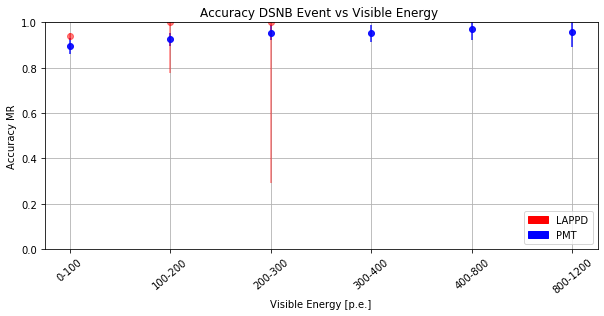

In [36]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,6)
x1=range(0,3)
axs=plt.errorbar(x, VisiblePMTEnergy_AccMR[:11],errorVisiblePMTEnergyMR[:11],c='blue', fmt='o',alpha=0.9) #(1, 0.5176470588235295, 0.3215686274509804)
axs=plt.errorbar(x1, VisibleLAPPDEnergy_AccMR[:6],errorVisibleLAPPDEnergyMR[:6],c='red', fmt='o',alpha=0.5) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color='blue', label='PMT ')
red_patch = mpatches.Patch(color='red', label='LAPPD')
plt.legend(handles=[red_patch,blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergy_AccMR)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy MR') 
  
# giving a title to my graph 
plt.title('Accuracy DSNB Event vs Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

# Electrons

In [44]:
VisiblePMTEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisiblePMTEnergySR.append((float(VisibleETest[event,0]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisiblePMTEnergySR=np.array(VisiblePMTEnergySR)

In [45]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(VisiblePMTEnergySR)):

 
    if VisiblePMTEnergySR[event,0]<=80 and VisiblePMTEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if VisiblePMTEnergySR[event,0]<=80:
         pi1=pi1+1
        
    if 80<=VisiblePMTEnergySR[event,0]<=100 and VisiblePMTEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 80<=VisiblePMTEnergySR[event,0]<=100:
         pi2=pi2+1
        
    if 100<=VisiblePMTEnergySR[event,0]<=120 and VisiblePMTEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 100<=VisiblePMTEnergySR[event,0]<=120:
        pi3=pi3+1
  
    if 120<=VisiblePMTEnergySR[event,0]<=140 and VisiblePMTEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 120<=VisiblePMTEnergySR[event,0]<=140:
        pi4=pi4+1
        
    if 140<=VisiblePMTEnergySR[event,0]<=160 and VisiblePMTEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 140<=VisiblePMTEnergySR[event,0]<=160:
        pi5=pi5+1
        
    if 160<=VisiblePMTEnergySR[event,0]<=180 and VisiblePMTEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 160<=VisiblePMTEnergySR[event,0]<=180:
        pi6=pi6+1
        


    
print(pi1, pi2, pi3, pi4, pi5, pi6) 

VisiblePMTEnergySR_Acc=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6]#,Bin700/pi7,Bin800/pi8,Bin900/pi9,Bin1000/pi10,Bin1500/pi11,Bin2000/pi12,Bin3000/pi13]
VisiblePMTEnergySR_AccError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6))#,1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9),1/sqrt(pi10),1/sqrt(pi11),1/sqrt(pi12),1/sqrt(pi13))

errorVisiblePMTEnergySR=[]
for i in range(6):
    errorVisiblePMTEnergySR.append(VisiblePMTEnergySR_AccError[i]* VisiblePMTEnergySR_Acc[i])

     

1023 1713 1362 1002 747 494


In [46]:
len(x),len(VisiblePMTEnergySR_Acc),len(errorVisiblePMTEnergySR)

(9, 6, 6)

6 13


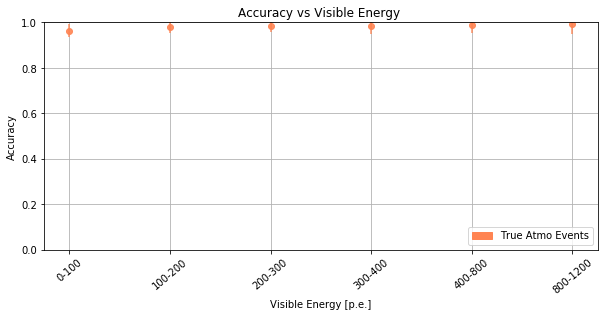

In [47]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,6)

axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Atmo Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
print(len(VisiblePMTEnergy_AccMR),len(labels))
plt.xticks(np.arange(len(VisiblePMTEnergySR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [48]:
VisibleLAPPDEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        VisibleLAPPDEnergySR.append((float(VisibleETest[event,1]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

VisibleLAPPDEnergySR=np.array(VisibleLAPPDEnergySR)

In [49]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = 0
Bin200 =0
Bin300 =0
Bin400 =0
Bin500 =0
Bin600 =0
Bin700 =0
Bin800 =0
Bin900 =0
Bin1000=0
Bin1500=0
Bin2000=0
Bin3000=0
Bin4000=0
Bin8000=0

#Range PionEn
for event in range(len(VisibleLAPPDEnergySR)):

    if VisibleLAPPDEnergySR[event,0]<=100 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if VisibleLAPPDEnergySR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=VisibleLAPPDEnergySR[event,0]<=200 and VisibleLAPPDEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=VisibleLAPPDEnergySR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=VisibleLAPPDEnergySR[event,0]<=300 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=VisibleLAPPDEnergySR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=VisibleLAPPDEnergySR[event,0]<=400 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=VisibleLAPPDEnergySR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=VisibleLAPPDEnergySR[event,0]<=800 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=VisibleLAPPDEnergySR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=VisibleLAPPDEnergySR[event,0]<=1200 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=VisibleLAPPDEnergySR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=VisibleLAPPDEnergySR[event,0]<=1800 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=VisibleLAPPDEnergySR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=VisibleLAPPDEnergySR[event,0]<=2500 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=VisibleLAPPDEnergySR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=VisibleLAPPDEnergySR[event,0]<=5000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=VisibleLAPPDEnergySR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=VisibleLAPPDEnergySR[event,0]<=10000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=VisibleLAPPDEnergySR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=VisibleLAPPDEnergySR[event,0]<=15000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=VisibleLAPPDEnergySR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=VisibleLAPPDEnergySR[event,0]<=20000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=VisibleLAPPDEnergySR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=VisibleLAPPDEnergySR[event,0]<=80000 and VisibleLAPPDEnergySR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=VisibleLAPPDEnergySR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=VisibleLAPPDEnergySR[event,0]<=4000 and VisibleLAPPDEnergySR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=VisibleLAPPDEnergySR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=VisibleLAPPDEnergySR[event,0]<=8000 and VisibleLAPPDEnergySR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=VisibleLAPPDEnergySR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5,) 

VisibleLAPPDEnergySR_Acc=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9]
VisibleLAPPDEnergySR_AccError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9))

errorVisibleLAPPDEnergySR=[]
for i in range(9):
    errorVisibleLAPPDEnergySR.append(VisibleLAPPDEnergySR_AccError[i]* VisibleLAPPDEnergySR_Acc[i])

     

6340 0 0 0 0


ZeroDivisionError: division by zero

ValueError: shape mismatch: objects cannot be broadcast to a single shape

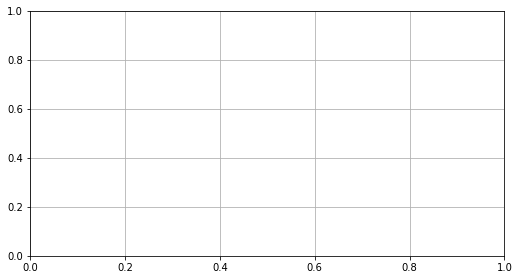

In [50]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,13)
x1=range(0,9)
axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c='blue', fmt='o',alpha=0.9) 
axs=plt.errorbar(x1, VisibleLAPPDEnergySR_Acc,errorVisibleLAPPDEnergySR,c='red', fmt='o',alpha=0.5) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color='blue', label='PMT ')
red_patch = mpatches.Patch(color='red', label='LAPPD')
plt.legend(handles=[red_patch,blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergySR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy SR') 
  
# giving a title to my graph 
plt.title('Accuracy Electron Event vs  Visible Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

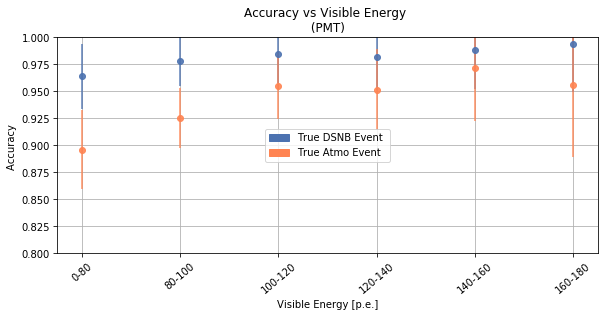

In [54]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,6)
x1=range(0,6)
axs=plt.errorbar(x, VisiblePMTEnergySR_Acc,errorVisiblePMTEnergySR,c=colorSR, fmt='o',alpha=0.9) 
axs=plt.errorbar(x1, VisiblePMTEnergy_AccMR,errorVisiblePMTEnergyMR,c=colorMR, fmt='o',alpha=0.9) 
plt.ylim(0.8, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=colorSR, label='True DSNB Event ')
red_patch = mpatches.Patch(color=colorMR, label='True Atmo Event')
plt.legend(handles=[blue_patch,red_patch],loc='center')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-80","80-100","100-120","120-140","140-160","160-180","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(VisiblePMTEnergySR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy ') 
  
# giving a title to my graph 
plt.title('Accuracy vs Visible Energy \n (PMT) ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

NameError: name 'VisibleLAPPDEnergySR_Acc' is not defined

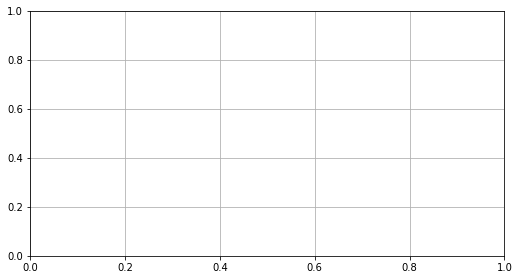

In [43]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,9)
x1=range(0,5)
axs=plt.errorbar(x, VisibleLAPPDEnergySR_Acc,errorVisibleLAPPDEnergySR,c=colorMR, fmt='o',alpha=0.9) 
axs=plt.errorbar(x1, VisibleLAPPDEnergy_AccMR,errorVisibleLAPPDEnergyMR,c=colorSR, fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=colorSR, label='True Muon Event ')
red_patch = mpatches.Patch(color=colorMR, label='True Electron Event')
plt.legend(handles=[red_patch,blue_patch],loc='center')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(VisibleLAPPDEnergySR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy ') 
  
# giving a title to my graph 
plt.title('Accuracy vs Visible Energy \n (LAPPD) ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

# True Parent Energy 

### Electron

In [48]:
ParentETest

array([939.58 , 939.572, 939.567, ...,  -2.   ,  -2.   ,  -2.   ])

In [49]:
unique, counts = np.unique(ParentETest, return_counts=True, axis=0)
print(counts)
print(unique)
print(100/(counts[0]+counts[1])*counts[1])


[3871   41  226  273  257  273  327  292  331  318  245  229  254  227
  201  161  172  189  148  135  139  138  116   83  110   80   70   79
   78   69   57   67   52   52   42   60   45   47   34   34   39   28
   36   32   24   27   17   20   36   22   15   16   10   14   13   20
   21   14    9    9    6    7    5   14   12    8    7    6    8    7
    4    5    7    7    6    1    5    2    5    3    6    4    3    3
    3    2    2    2    1    2    1    1    1    1    1    1    2    1
    1    1    1    1    1]
[ -2.    939.565 939.566 939.567 939.568 939.569 939.57  939.571 939.572
 939.573 939.574 939.575 939.576 939.577 939.578 939.579 939.58  939.581
 939.582 939.583 939.584 939.585 939.586 939.587 939.588 939.589 939.59
 939.591 939.592 939.593 939.594 939.595 939.596 939.597 939.598 939.599
 939.6   939.601 939.602 939.603 939.604 939.605 939.606 939.607 939.608
 939.609 939.61  939.611 939.612 939.613 939.614 939.615 939.616 939.617
 939.618 939.619 939.62  939.621 939.62

In [44]:
TruePMTEnergySR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,0] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        TruePMTEnergySR.append((float(ParentETest[event]),feature_maps[event,0]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

TruePMTEnergySR=np.array(TruePMTEnergySR)

In [47]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(TruePMTEnergySR)):

    if TruePMTEnergySR[event,0]<=850 and TruePMTEnergySR[event,1]>0.5:
        Bin100 = Bin100+1
    if TruePMTEnergySR[event,0]<=850:
         pi1=pi1+1
        
    if 850<=TruePMTEnergySR[event,0]<=900 and TruePMTEnergySR[event,1]>0.5:
         Bin200 = Bin200+1
    if 850<=TruePMTEnergySR[event,0]<=900:
         pi2=pi2+1
        
    if 200<=TruePMTEnergySR[event,0]<=300 and TruePMTEnergySR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=TruePMTEnergySR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=TruePMTEnergySR[event,0]<=400 and TruePMTEnergySR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=TruePMTEnergySR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=TruePMTEnergySR[event,0]<=800 and TruePMTEnergySR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=TruePMTEnergySR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=TruePMTEnergySR[event,0]<=1200 and TruePMTEnergySR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=TruePMTEnergySR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=TruePMTEnergySR[event,0]<=1800 and TruePMTEnergySR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=TruePMTEnergySR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=TruePMTEnergySR[event,0]<=2500 and TruePMTEnergySR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=TruePMTEnergySR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=TruePMTEnergySR[event,0]<=5000 and TruePMTEnergySR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=TruePMTEnergySR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=TruePMTEnergySR[event,0]<=10000 and TruePMTEnergySR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=TruePMTEnergySR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=TruePMTEnergySR[event,0]<=15000 and TruePMTEnergySR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=TruePMTEnergySR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=TruePMTEnergySR[event,0]<=20000 and TruePMTEnergySR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=TruePMTEnergySR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=TruePMTEnergySR[event,0]<=80000 and TruePMTEnergySR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=TruePMTEnergySR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=TruePMTEnergySR[event,0]<=4000 and TruePMTEnergySR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=TruePMTEnergySR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=TruePMTEnergySR[event,0]<=8000 and TruePMTEnergySR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=TruePMTEnergySR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

TruePMTEnergySR_Acc=[Bin100/pi1,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9]
TruePMTEnergySR_AccError=(1/sqrt(pi1),1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9))

errorTruePMTEnergySR=[]
for i in range(9):
    errorTruePMTEnergySR.append(TruePMTEnergySR_AccError[i]* TruePMTEnergySR_Acc[i])

     

0 0 0 0 0 6340 0 0 0 0 0 0 0 0 0


ZeroDivisionError: division by zero

In [65]:
len(x),len(VisiblePMTEnergySR_Acc),len(errorVisiblePMTEnergySR)

(9, 13, 13)

10 13


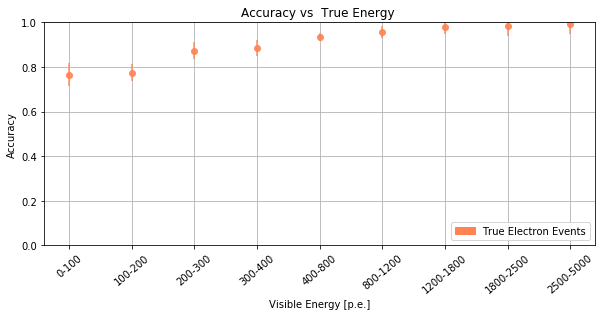

In [66]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,9)

axs=plt.errorbar(x, TruePMTEnergySR_Acc,errorTruePMTEnergySR,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Electron Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
print(len(VisiblePMTEnergy_AccMR),len(labels))
plt.xticks(np.arange(len(TruePMTEnergySR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs  True Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [67]:
TruePMTEnergyMR=[]

dummyindex2=[]
Multiring_Counter2 =0
Pion_Counter2 =0
for event in range(len(feature_maps)):
    if YTest[event,1] > 0.5:
        Multiring_Counter2 = Multiring_Counter2+1
        TruePMTEnergyMR.append((float(ParentETest[event]),feature_maps[event,1]))
        dummyindex2.append(0)
        
    else:
        dummyindex2.append(1)

TruePMTEnergyMR=np.array(TruePMTEnergyMR)

In [68]:
###### SingleRinge
pi1= pi2= pi3= pi4= pi5= pi6= pi7= pi8= pi9= pi10= pi11= pi12= pi13= pi14= pi15 = 0
Bin100 = Bin200 =Bin300 =Bin400 =Bin500 =Bin600 =Bin700 =Bin800 =Bin900 =Bin1000=Bin1500=Bin2000=Bin3000=Bin4000=Bin8000=0

#Range PionEn
for event in range(len(TruePMTEnergyMR)):

    if TruePMTEnergyMR[event,0]<=100 and TruePMTEnergyMR[event,1]>0.5:
        Bin100 = Bin100+1
    if TruePMTEnergyMR[event,0]<=100:
         pi1=pi1+1
        
    if 100<=TruePMTEnergyMR[event,0]<=200 and TruePMTEnergyMR[event,1]>0.5:
         Bin200 = Bin200+1
    if 100<=TruePMTEnergyMR[event,0]<=200:
         pi2=pi2+1
        
    if 200<=TruePMTEnergyMR[event,0]<=300 and TruePMTEnergyMR[event,1]>0.5:
        Bin300 = Bin300+1
    if 200<=TruePMTEnergyMR[event,0]<=300:
        pi3=pi3+1
  
    if 300<=TruePMTEnergyMR[event,0]<=400 and TruePMTEnergyMR[event,1]>0.5:
        Bin400 = Bin400+1
    if 300<=TruePMTEnergyMR[event,0]<=400:
        pi4=pi4+1
        
    if 400<=TruePMTEnergyMR[event,0]<=800 and TruePMTEnergyMR[event,1]>0.5:
        Bin500 = Bin500+1
    if 400<=TruePMTEnergyMR[event,0]<=800:
        pi5=pi5+1
        
    if 800<=TruePMTEnergyMR[event,0]<=1200 and TruePMTEnergyMR[event,1]>0.5:
        Bin600 = Bin600+1
    if 800<=TruePMTEnergyMR[event,0]<=1200:
        pi6=pi6+1
        
    if 1200<=TruePMTEnergyMR[event,0]<=1800 and TruePMTEnergyMR[event,1]>0.5:
        Bin700 = Bin700+1
    if 1200<=TruePMTEnergyMR[event,0]<=1800:
        pi7=pi7+1
        
    if 1800<=TruePMTEnergyMR[event,0]<=2500 and TruePMTEnergyMR[event,1]>0.5:
        Bin800 = Bin800+1
    if 1800<=TruePMTEnergyMR[event,0]<=2500:
        pi8=pi8+1
        
    if 2500<=TruePMTEnergyMR[event,0]<=5000 and TruePMTEnergyMR[event,1]>0.5:
        Bin900 = Bin900+1
    if 2500<=TruePMTEnergyMR[event,0]<=5000:
        pi9=pi9+1
        
    if 5000<=TruePMTEnergyMR[event,0]<=10000 and TruePMTEnergyMR[event,1]>0.5:
        Bin1000 = Bin1000+1
    if 5000<=TruePMTEnergyMR[event,0]<=10000:
        pi10=pi10+1
        
    if 10000<=TruePMTEnergyMR[event,0]<=15000 and TruePMTEnergyMR[event,1]>0.5:
        Bin1500 = Bin1500+1
    if 10000<=TruePMTEnergyMR[event,0]<=15000:
        pi11=pi11+1

    if 15000<=TruePMTEnergyMR[event,0]<=20000 and TruePMTEnergyMR[event,1]>0.5:
        Bin2000 = Bin2000+1
    if 15000<=TruePMTEnergyMR[event,0]<=20000:
        pi12=pi12+1
        
    if 20000<=TruePMTEnergyMR[event,0]<=80000 and TruePMTEnergyMR[event,1]>0.5:
        Bin3000 = Bin3000+1
    if 20000<=TruePMTEnergyMR[event,0]<=80000:
        pi13=pi13+1
        
#     if 3000<=TruePMTEnergyMR[event,0]<=4000 and TruePMTEnergyMR[event,1]>0.5:
#         Bin4000 = Bin4000+1
#     if 3000<=TruePMTEnergyMR[event,0]<=4000:
#         pi14=pi14+1
        
#     if 4000<=TruePMTEnergyMR[event,0]<=8000 and TruePMTEnergyMR[event,1]>0.5:
#         Bin8000 = Bin8000+1
#     if 4000<=TruePMTEnergyMR[event,0]<=8000:
#         pi15=pi15+1

    
print(pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8, pi9, pi10, pi11, pi12, pi13, pi14, pi15) 

TruePMTEnergyMR_Acc=[0,Bin200/pi2,Bin300/pi3,Bin400/pi4,Bin500/pi5,Bin600/pi6,Bin700/pi7,Bin800/pi8,Bin900/pi9]
TruePMTEnergyMR_AccError=(0,1/sqrt(pi2),1/sqrt(pi3),1/sqrt(pi4),1/sqrt(pi5),1/sqrt(pi6),1/sqrt(pi7),1/sqrt(pi8),1/sqrt(pi9))

errorTruePMTEnergyMR=[]
for i in range(9):
    errorTruePMTEnergyMR.append(TruePMTEnergyMR_AccError[i]* TruePMTEnergyMR_Acc[i])

     

0 16 385 925 3685 1223 615 291 267 5 0 0 0 0 0


In [69]:
len(x),len(TruePMTEnergyMR_Acc)

(9, 9)

10 13


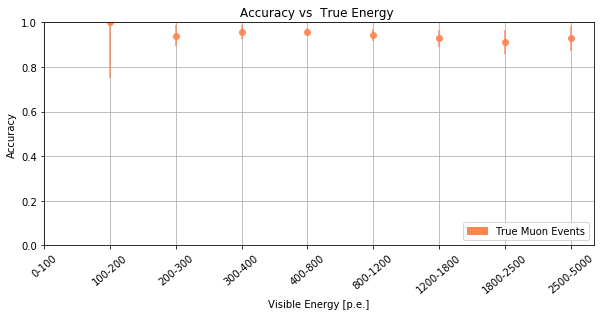

In [70]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(1,9)

axs=plt.errorbar(x, TruePMTEnergyMR_Acc[1:],errorTruePMTEnergyMR[1:],c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Muon Events')
plt.legend(handles=[blue_patch],loc='lower right')

#plt.legend()
# naming the x axis 
plt.xlabel('Visible Energy [p.e.]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
print(len(VisiblePMTEnergy_AccMR),len(labels))
plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs  True Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

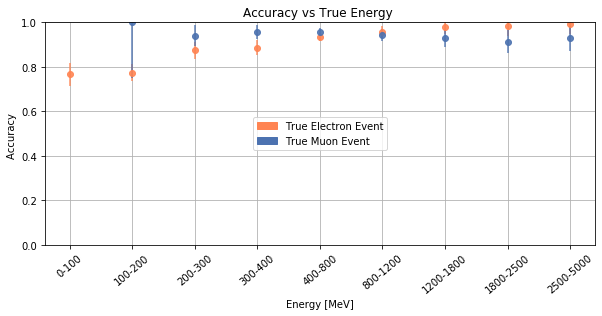

In [71]:
# plotting the points 
plt.rcParams['figure.figsize'] = [17/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,9)
x1=range(1,9)
axs=plt.errorbar(x, TruePMTEnergySR_Acc,errorTruePMTEnergySR,c=colorMR, fmt='o',alpha=0.9) 
axs=plt.errorbar(x1,TruePMTEnergyMR_Acc[1:],errorTruePMTEnergyMR[1:],c=colorSR, fmt='o',alpha=0.9) 
plt.ylim(0, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=colorSR, label='True Muon Event ')
red_patch = mpatches.Patch(color=colorMR, label='True Electron Event')
plt.legend(handles=[red_patch,blue_patch],loc='center')

#plt.legend()
# naming the x axis 
plt.xlabel('Energy [MeV]')



labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')
plt.tick_params(axis='both',length=4)
# naming the y axis 
plt.ylabel('Accuracy ') 
  
# giving a title to my graph 
plt.title('Accuracy vs True Energy ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

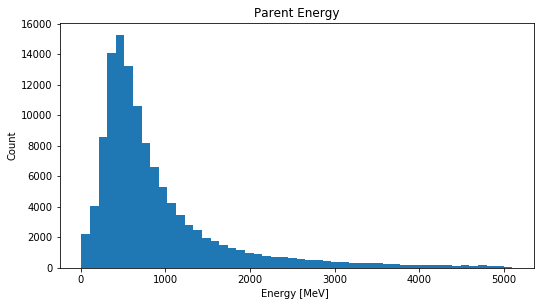

In [53]:
plt.hist(ParentE, bins=50,histtype='stepfilled')
plt.title("Parent Energy")
plt.xlabel("Energy [MeV] ")
plt.ylabel("Count")
plt.grid(False)
plt.show()

In [50]:
EnerglisteSR=[]
RightEventsSR=[]
EnerglisteMR=[]
RightEventsMR=[]
for event in range(len(feature_maps)):
    if YTest[event,0]>0.5 and feature_maps[event,0]>0.5:
        RightEventsSR.append(feature_maps[event,0])
        EnerglisteSR.append(ParentETest[event])
    if YTest[event,1]>0.5 and feature_maps[event,1]>0.5:
        RightEventsMR.append(feature_maps[event,0])
        EnerglisteMR.append(ParentETest[event])


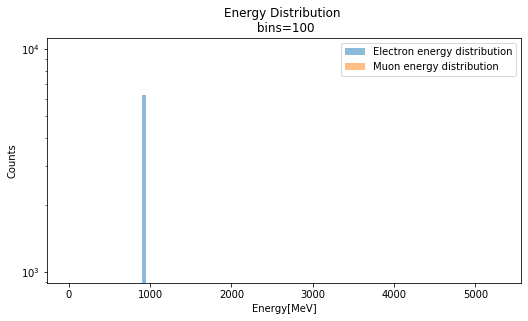

In [51]:
plt.hist(EnerglisteSR,range=(0,5300), bins=100, alpha=0.5,log=True, label='Electron energy distribution')
plt.hist(EnerglisteMR,range=(0,5300), bins=100, alpha=0.5,log=True, label='Muon energy distribution')
plt.legend(loc='upper right')
plt.xlabel('Energy[MeV]') 
# naming the y axis 
plt.ylabel('Counts') 
  
# giving a title to my graph 
plt.title('Energy Distribution \n bins=100')
plt.show()

Histogramm Muon

In [52]:
x = feature_maps[:,1]
x1=[]
x2=[]


for value in range(len(x)):
    if YTest[value,1] > YTest[value,0]:
        x1.append(x[value])
        x2.append(1-x[value])
    
y = feature_maps[:,0]
y1=[]
y2=[]
for value in range(len(y)):
    if YTest[value,1] < YTest[value,0]:
        y1.append(y[value])
        y2.append(1-y[value])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


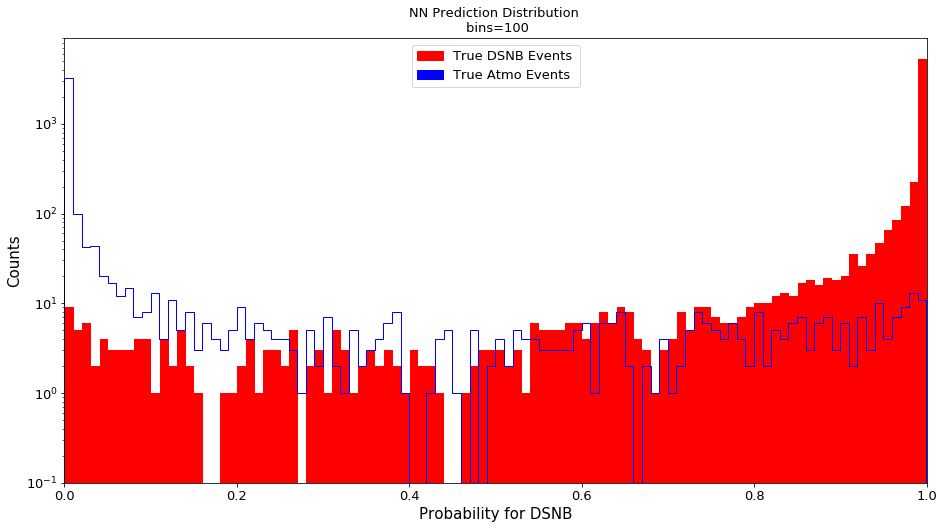

In [77]:
plt.hist(x1 ,bins=100,align='mid', color='red',histtype='stepfilled', log=True)
plt.hist(y2,bins=100,histtype='step',normed=False,color='blue',align='mid',log=True)
plt.xlim(0.0,1)

red_patch = mpatches.Patch(color='red', label='True DSNB Events')


blue_patch = mpatches.Patch(color='blue', label='True Atmo Events ')

plt.legend(handles=[red_patch,
                    #purple_patch,
                    blue_patch],loc='upper center')

plt.xlabel('Probability for DSNB') 
# naming the y axis http://localhost:8888/notebooks/Documents/Python/CNN_Masterarbeit/DSNB/DSNB%20-%20Energy%20Discussion%205x5.ipynb#
plt.ylabel('Counts') 
  
# giving a title to my graph 
plt.title('NN Prediction Distribution \n bins=100')
plt.show()

In [171]:
Y[1]

array([1, 0])

# Purity Efficiency and rel Uncertanty

In [55]:
unique, counts = np.unique(YTest, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [3871 6340]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 62.08990304573499


In [77]:
from tqdm.notebook import tqdm
#Schnitt = np.arange(0,1.0, 0.1)
Schnitt = np.arange(0,1.0, 0.001)
x = feature_maps[:,0]
x1=[]
x2=[]


for value in range(len(x)):
    if YTest[value,0] > YTest[value,1]:
        x1.append(x[value])
        x2.append(1-x[value])
    
y = feature_maps[:,1]
y1=[]
y2=[]
for value in range(len(y)):
    if YTest[value,0] < YTest[value,1]:
        y1.append(y[value])
        y2.append(1-y[value])


index=0

SR_list = []
MR_list = []

SR_PKA = []
MR_PKA = []

for cut in tqdm(Schnitt):
        
#     if cut== 0.9500000000000001:####0.127: ##0.127:        #0.9500000000000001:
#         print(counter,counter2,"TM_NM = ",TM_NM ,"TM_NS ",TM_NS ,"TS_NM =",TS_NM,"TS_NS =", TS_NS)
#         break
        
  
    
    liste_TrueSR_NNSR=[]
    liste2_TrueMR_NNMR=[]
    
    counter=counter2=counter3=TM_NM=TM_NS=TS_NM=TS_NS=0
    for event in x:
        
        if event >= cut:
            counter=counter+1
            if YTest[counter3,0] > YTest[counter3,1]:
                #Netzwerk denkt SR, ist auch TRUE SR
                TS_NS = TS_NS+1
            if YTest[counter3,0] < YTest[counter3,1]:
                #Netzwerk denkt SR, ist aber TRUE MR
                
                TM_NS = TM_NS+1
        else:
            counter2 = counter2+1
            if YTest[counter3,0] > YTest[counter3,1]:
                #Netzwerk denkt MR, ist aber TRUE SR
                TS_NM = TS_NM+1
            if YTest[counter3,0] < YTest[counter3,1]:
                TM_NM = TM_NM+1
        counter3 = counter3+1      
                
    for event in range(len(x1)):
        if x1[event] > cut:   #NN-Werte für True-SR N=6105
            liste_TrueSR_NNSR.append(event)
            #man arbeitet mit der Länge der Liste 

    for event in range(len(y1)):      
        if y1[event] > cut:   #NN-Werte für Ture-MR
            liste2_TrueMR_NNMR.append(event)
            #man arbeitet mit der Länge der Liste

    wrongliste=[]
    trueliste=[]
    
    for event in y2: #True MR, allerdings 1-Minus-prediction für Multiringe. dh. flasch klassifiziert ist über 0.5, richitg klassiziert unter 0.5
        if event > cut:
            wrongliste.append(event) #NN denkt SR, Event ist aber True MR, #unten links in der CM
        else:
            trueliste.append(event)  #NN denkt MR, Event ist      True MR  #unten rechts in der CM
    
    
    
    wrongliste2=[]
    trueliste2=[]
    
    for event in x2: #True SR, allerdings Werte der 1-Minus-prediction für SR. dh. flasch klassifiziert ist über 0.5, richitg klassiziert unter 0.5
        if event > cut:
            wrongliste2.append(event) #NN denkt MR, Event ist aber True SR, #oben rechts in der CM
        else:
            trueliste2.append(event)  #NN denkt SR, Event ist       True SR, #oben links in der CM
            

    
    AccurnecySR = 1/((len(liste_TrueSR_NNSR)/6340)+(len(wrongliste2)/3871)) * (len(liste_TrueSR_NNSR)/6340)
    AccurnecyMR = 1/(len(liste2_TrueMR_NNMR)+len(wrongliste)) * len(liste2_TrueMR_NNMR)
    
    PuritySR = 1/((len(liste_TrueSR_NNSR)/6340)+(len(wrongliste)/3871)) * (len(liste_TrueSR_NNSR)/6340)
    PurityMR = 1/(len(liste2_TrueMR_NNMR)+len(wrongliste2)) * len(liste2_TrueMR_NNMR)
    
    relPuritySR = sqrt(len(liste_TrueSR_NNSR)+len(wrongliste)) / len(liste_TrueSR_NNSR)
    relPurityMR = sqrt(len(liste2_TrueMR_NNMR)+len(wrongliste2)) / len(liste2_TrueMR_NNMR)
    
    relPuritySR2 = sqrt(TS_NS+TM_NS) /TS_NS
    relPurityMR2 = sqrt(TM_NM+TS_NM) /TM_NM
        
    relPuritySR3 = sqrt(TS_NS+TM_NS) /TS_NS
    relPurityMR3 = sqrt(TM_NM+TS_NM) /TM_NM
    
    Res_SR = len(liste_TrueSR_NNSR)/6340#  
    Res_SR_Pol = len(wrongliste)/(len(liste_TrueSR_NNSR)+len(wrongliste))
    Res_SR_Pol2 = len(wrongliste)/3871 
    Res_MR = len(liste2_TrueMR_NNMR)/3871   #4336
    Res_MR_Pol = len(wrongliste2)/(len(liste2_TrueMR_NNMR)+len(wrongliste2))
    Res_MR_Pol2 = len(wrongliste2)/6340
    
    Acc_Pur_SR = AccurnecySR*PuritySR
    Acc_Pur_MR = AccurnecyMR*PurityMR
    
    
    
    SR_list.append((Acc_Pur_SR,Res_SR,AccurnecySR,PuritySR,Res_SR*PuritySR**2,relPuritySR,relPuritySR2,Res_SR_Pol,Res_SR_Pol2,len(liste_TrueSR_NNSR),len(wrongliste)))
    MR_list.append((Acc_Pur_MR,Res_MR,AccurnecyMR,PurityMR,Res_MR*PurityMR**2,relPurityMR,relPurityMR2,Res_MR_Pol,Res_MR_Pol2,len(liste2_TrueMR_NNMR),len(wrongliste2)))

#     print( "Selected Cut: ", cut)
#     print("Accurnecy SR:", AccurnecySR)
#     print("Accurnecy SR:", AccurnecyMR)
    if cut==0.5:
        print("Purity SR: ", PuritySR, len(wrongliste),len(liste_TrueSR_NNSR) )
#     print("Purity MR: ", PurityMR)   

#     print("Accurnecy SR * Purity SR",AccurnecySR*PuritySR )
#     print("Accurnecy MR * Purity MR",AccurnecyMR*PurityMR )
    
#     print("Data remaining SR: ", Res_SR*100, "%")
#     print("Data remaining MR: ",Res_MR*100 ,"%")
    
#     print("----------------------------------------","\n \n \n \n ","----------------------------------------")
    
# Purity: CM vertikal
# ACC : CM horizontal
SR_list = np.array(SR_list)
MR_list = np.array(MR_list)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in double_scalars


Purity SR:  0.940982161313418 238 6215



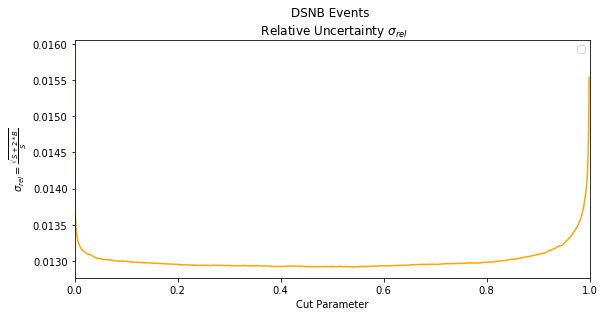

In [78]:
SR_list = np.array(SR_list)
MR_list = np.array(MR_list)

plt.plot(Schnitt, SR_list[:,5],c='orange',alpha=1)#relative uncertainty #*55

orange_patch = mpatches.Patch(color='orange', label='Testset')#Relative uncertainty

plt.xlim(0, 1)


plt.legend(handles=[

                   ],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Cut Parameter') 
# naming the y axis 
plt.ylabel(r'$\sigma_{rel}=\frac{\sqrt{S+2*B}}{S}$') 
  
# giving a title to my graph 
plt.title('DSNB Events \n Relative Uncertainty $\sigma_{rel}$') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

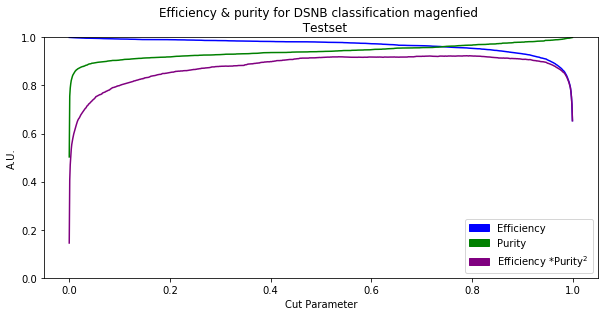

In [80]:
plt.rcParams['figure.figsize'] = [17/2, 9/2]

plt.plot(Schnitt, SR_list[:,1],c='blue',alpha=1)#Efficiency 
plt.plot(Schnitt, SR_list[:,3],c='green',alpha=1)#Purity
#plt.plot(Schnitt, SR_list[:,4],c='purple',alpha=1) #efficency*purity**2
plt.plot(Schnitt, SR_list[:,1]*MR_list[:,3]*MR_list[:,3],c='purple',alpha=1)


green_patch= mpatches.Patch(color='green', label='Purity')
blue_patch = mpatches.Patch(color='blue', label='Efficiency')
purple_patch = mpatches.Patch(color='purple', label=r'Efficiency *Purity$^2$')

plt.ylim(0, 1)

plt.legend(handles=[blue_patch, green_patch,purple_patch],loc='best')
#plt.legend()
# naming the x axis 
plt.xlabel('Cut Parameter') 
# naming the y axis 
plt.ylabel('A.U.') 
  
# giving a title to my graph 
plt.title('Efficiency & purity for DSNB classification magenfied \n  Testset') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

# MRD Cluster vs Muon Acc.

In [197]:
feature_maps[counter,1],YTest[counter,1]==1

(0.9950021, True)

In [80]:
####### MRD Cluster Set#######

counter=0

NewYTest1=[]
FeatureMap1=[]

for x in XMRDTest:
    if x[0]==0 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap1.append(feature_maps[counter])
        NewYTest1.append(YTest[counter])

    counter=counter+1
counter=0
NewYTest2=[]
FeatureMap2=[]
for x in XMRDTest:
    if x[0]==1 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap2.append(feature_maps[counter])
        NewYTest2.append(YTest[counter])

    counter=counter+1
counter=0
NewYTest3=[]
FeatureMap3=[]

for x in XMRDTest:
    if x[0]==2 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap3.append(feature_maps[counter])
        NewYTest3.append(YTest[counter])

    counter=counter+1
counter=0
    

NewYTest1=np.array(NewYTest1)
NewYTest2=np.array(NewYTest2)
NewYTest3=np.array(NewYTest3)

FeatureMap1= np.array(FeatureMap1)
FeatureMap2= np.array(FeatureMap2)
FeatureMap3= np.array(FeatureMap3)

In [81]:
counter=0

TNewYTest1=[]
TFeatureMap1=[]

for x in XMRDTest:
    if x[0]==0 and YTest[counter,1]==1:
        TFeatureMap1.append(feature_maps[counter])
        TNewYTest1.append(YTest[counter])

    counter=counter+1
counter=0
TNewYTest2=[]
TFeatureMap2=[]
for x in XMRDTest:
    if x[0]==1 and YTest[counter,1]==1:
        TFeatureMap2.append(feature_maps[counter])
        TNewYTest2.append(YTest[counter])

    counter=counter+1
counter=0
TNewYTest3=[]
TFeatureMap3=[]

for x in XMRDTest:
    if x[0]==2 and YTest[counter,1]==1:
        TFeatureMap3.append(feature_maps[counter])
        TNewYTest3.append(YTest[counter])

    counter=counter+1
counter=0
    

TNewYTest1=np.array(TNewYTest1)
TNewYTest2=np.array(TNewYTest2)
TNewYTest3=np.array(TNewYTest3)

TFeatureMap1= np.array(TFeatureMap1)
TFeatureMap2= np.array(TFeatureMap2)
TFeatureMap3= np.array(TFeatureMap3)

In [85]:
Acc0=[len(NewYTest1)/len(TNewYTest1),len(NewYTest2)/len(TNewYTest2)]#,len(NewYTest3)/len(TNewYTest3)]
AccError0=(1/sqrt(len(TNewYTest1)),1/sqrt(len(TNewYTest2)))#,1/sqrt(len(TNewYTest3)))

errorACC0=[]
for i in range(2):
    errorACC0.append(AccError0[i]* Acc0[i])


In [69]:
len(NewYTest3),len(TNewYTest3),errorACC0[2]

IndexError: list index out of range

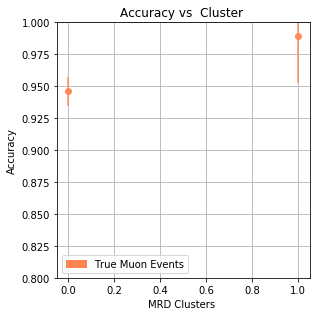

In [88]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
plt.rcParams['figure.figsize'] = [9/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,2)

axs=plt.errorbar(x, Acc0,errorACC0,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
plt.ylim(0.8, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='True Muon Events')
plt.legend(handles=[blue_patch],loc='lower left')

#plt.legend()
# naming the x axis 
plt.xlabel('MRD Clusters ')



#labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
#print(len(VisiblePMTEnergy_AccMR),len(labels))
#plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy vs  Cluster ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

# CNN überprüung des Clusters

W0708 01:30:49.388994 86988 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 120, 400)      7600      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 120, 400)      1440400   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 40, 400)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 17, 40, 400)       1600      
_________________________________________________________________
dropout_6 (Dropout)          (None, 17, 40, 400)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 17, 40, 400)       1440400   
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 40, 400)      

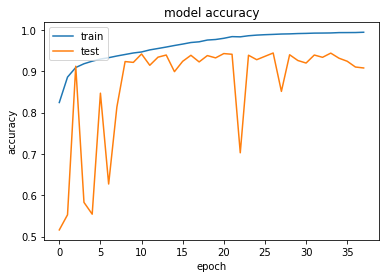

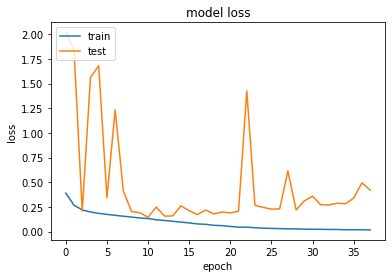

Ende des Versuchs: 


In [20]:
dense_layers = [1]
layer_sizes = [400]
conv_layers = [4]
kernal_size = [(3,3)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT_LAPPD5x5_tf_ohneMRD-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\Test\{}'.format(NAME))


                model = Sequential()
                
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XTraining.shape[1:],activation="relu", padding='same'))                                               
                model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu")) 
                model.add(MaxPooling2D(pool_size=(3,3),padding='same'))
                
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu")) 
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="CNN-Det_tf_lappd5x5-improvement_EnergyTester_V2-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(
                    
                    XTraining,YTraining,
              #validation_data=(XVal,Yval)
                 validation_data=(XVal,YVal)   
                                                    
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            tensorboard 
                ],
              epochs= 38)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [91]:
model = tf.keras.models.load_model("CNN-Det_tf_lappd5x5-improvement_EnergyTester_V2-val-acc_0.94.model")

In [92]:
feature_maps = np.array(model.predict([XTest,XMRDTest[:,:5]], batch_size=100, verbose=0))

In [23]:
score = model.evaluate([XTest,XMRDTest[:,:5]], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23238017127272864
Test accuracy:  0.94041985


In [24]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTest,XMRDTest[:,:5]], batch_size=100, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[7035  558]
 [ 336 7076]]


[[0.92651126 0.07348874]
 [0.04533189 0.95466811]]


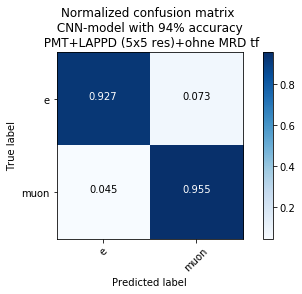

In [25]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 94% accuracy \n PMT+LAPPD (5x5 res)+ohne MRD tf')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [93]:
####### MRD Cluster Set#######

counter=0

NewYTest1=[]
FeatureMap1=[]

for x in XMRDTest:
    if x[0]==0 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap1.append(feature_maps[counter])
        NewYTest1.append(YTest[counter])

    counter=counter+1
counter=0
NewYTest2=[]
FeatureMap2=[]
for x in XMRDTest:
    if x[0]==1 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap2.append(feature_maps[counter])
        NewYTest2.append(YTest[counter])

    counter=counter+1
counter=0
NewYTest3=[]
FeatureMap3=[]

for x in XMRDTest:
    if x[0]==2 and YTest[counter,1]==1 and feature_maps[counter,1]>0.5:
        FeatureMap3.append(feature_maps[counter])
        NewYTest3.append(YTest[counter])

    counter=counter+1
counter=0
    

NewYTest1=np.array(NewYTest1)
NewYTest2=np.array(NewYTest2)
NewYTest3=np.array(NewYTest3)

FeatureMap1= np.array(FeatureMap1)
FeatureMap2= np.array(FeatureMap2)
FeatureMap3= np.array(FeatureMap3)
counter=0

TNewYTest1=[]
TFeatureMap1=[]

for x in XMRDTest:
    if x[0]==0 and YTest[counter,1]==1:
        TFeatureMap1.append(feature_maps[counter])
        TNewYTest1.append(YTest[counter])

    counter=counter+1
counter=0
TNewYTest2=[]
TFeatureMap2=[]
for x in XMRDTest:
    if x[0]==1 and YTest[counter,1]==1:
        TFeatureMap2.append(feature_maps[counter])
        TNewYTest2.append(YTest[counter])

    counter=counter+1
counter=0
TNewYTest3=[]
TFeatureMap3=[]

for x in XMRDTest:
    if x[0]==2 and YTest[counter,1]==1:
        TFeatureMap3.append(feature_maps[counter])
        TNewYTest3.append(YTest[counter])

    counter=counter+1
counter=0
    

TNewYTest1=np.array(TNewYTest1)
TNewYTest2=np.array(TNewYTest2)
TNewYTest3=np.array(TNewYTest3)

TFeatureMap1= np.array(TFeatureMap1)
TFeatureMap2= np.array(TFeatureMap2)
TFeatureMap3= np.array(TFeatureMap3)

In [103]:
len(TNewYTest1),len(TNewYTest2)

(6676, 736)

In [95]:
AccC=[len(NewYTest1)/len(TNewYTest1),len(NewYTest2)/len(TNewYTest2)]#,len(NewYTest3)/len(TNewYTest3)]
AccErrorC=(1/sqrt(len(TNewYTest1)),1/sqrt(len(TNewYTest2)))#,1/sqrt(len(TNewYTest3)))

errorACCC=[]
for i in range(2):
    errorACCC.append(AccErrorC[i]* AccC[i])


In [3]:
Acc0

NameError: name 'Acc0' is not defined

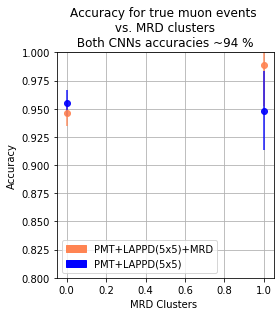

In [102]:
# plotting the points 
#plt.rcParams['figure.figsize'] = [17/2, 9/2]
plt.rcParams['figure.figsize'] = [8/2, 9/2]
fig, axs = plt.subplots()
axs.grid()
x=range(0,2)

axs=plt.errorbar(x, Acc0,errorACC0,c=(1, 0.5176470588235295, 0.3215686274509804), fmt='o',alpha=0.9) 
axs=plt.errorbar(x, AccC,errorACCC,c='blue', fmt='o',alpha=0.9) 
plt.ylim(0.8, 1)
#red_patch = mpatches.Patch(color='red', label=' Single Rings')


blue_patch = mpatches.Patch(color=(1, 0.5176470588235295, 0.3215686274509804), label='PMT+LAPPD(5x5)+MRD')
blueish_patch = mpatches.Patch(color='blue', label='PMT+LAPPD(5x5)')
plt.legend(handles=[blue_patch,blueish_patch],loc='lower left')

#plt.legend()
# naming the x axis 
plt.xlabel('MRD Clusters ')



#labels=("0-100","100-200","200-300","300-400","400-800","800-1200","1200-1800","1800-2500","2500-5000","5000-10000","10000-15000","15000-20000","20000-")
          # Get locations and labels
#print(len(VisiblePMTEnergy_AccMR),len(labels))
#plt.xticks(np.arange(len(TruePMTEnergyMR_Acc)), labels, rotation='40')

# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy for true muon events \n vs. MRD clusters \n Both CNNs accuracies ~94 % ') 
  
# function to show the plot 
plt.tight_layout()
plt.show() 

In [87]:
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



In [88]:
import matplotlib.backends.backend_pdf

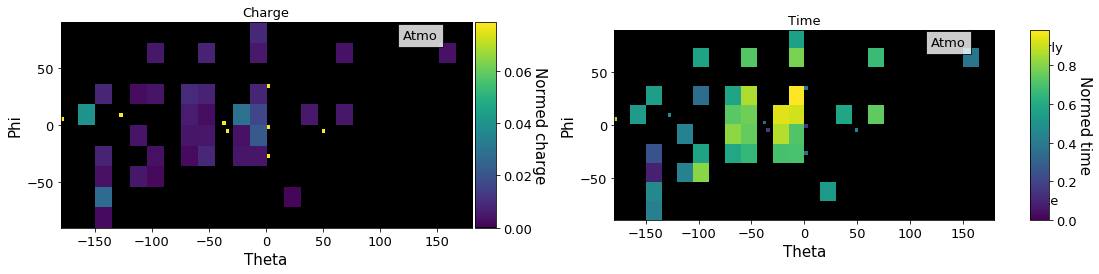

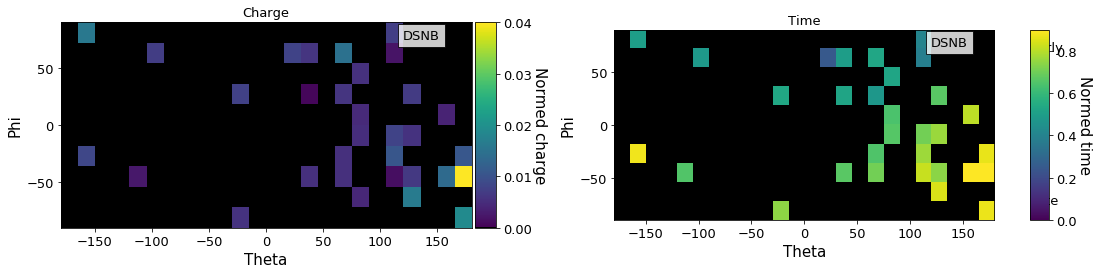

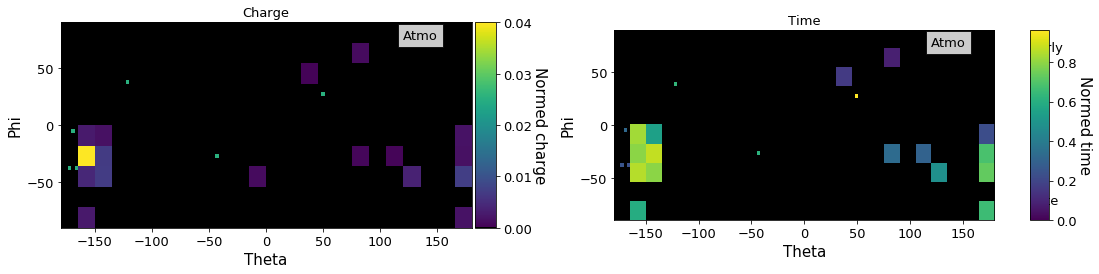

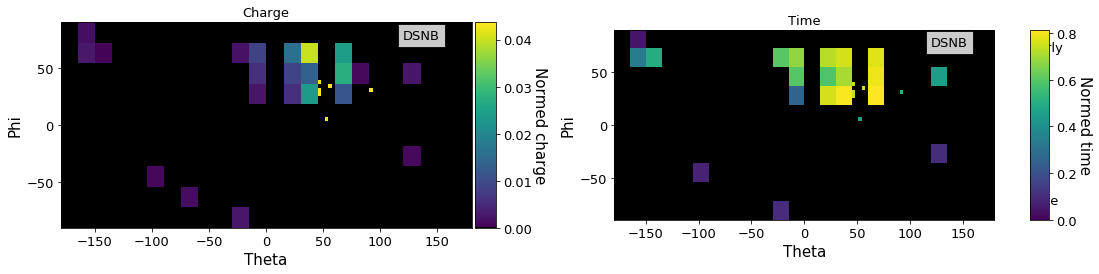

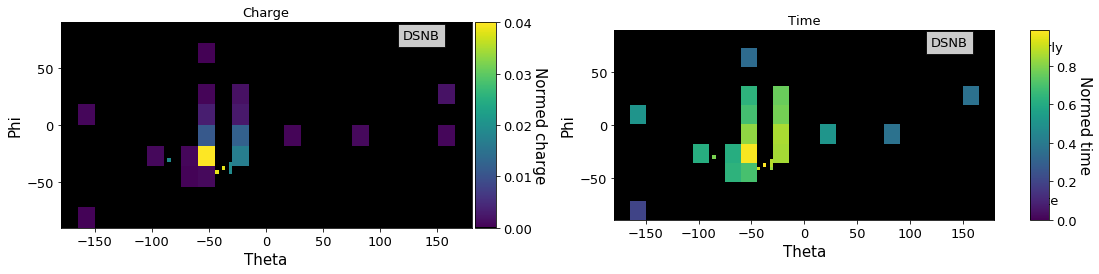

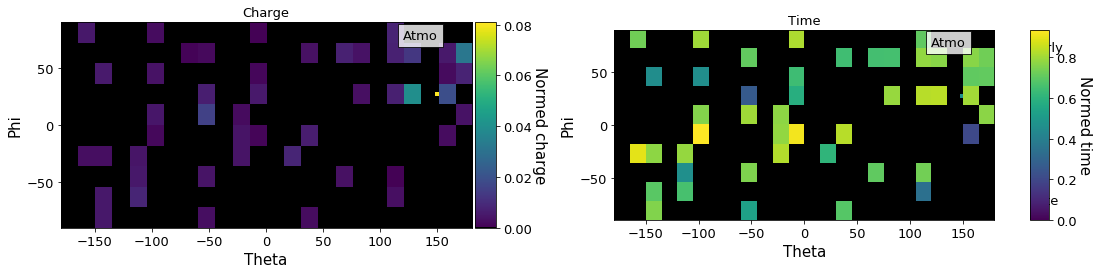

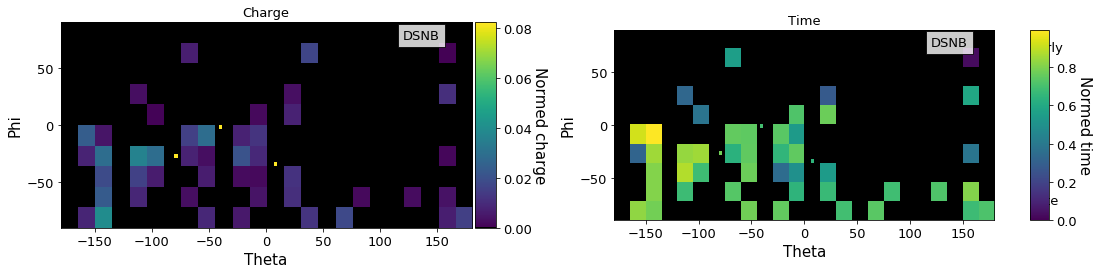

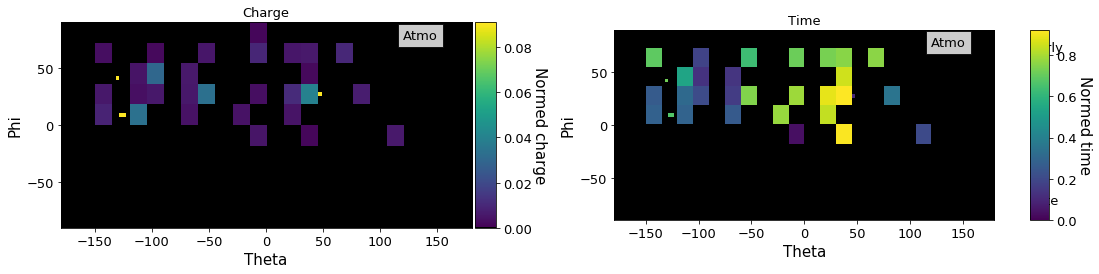

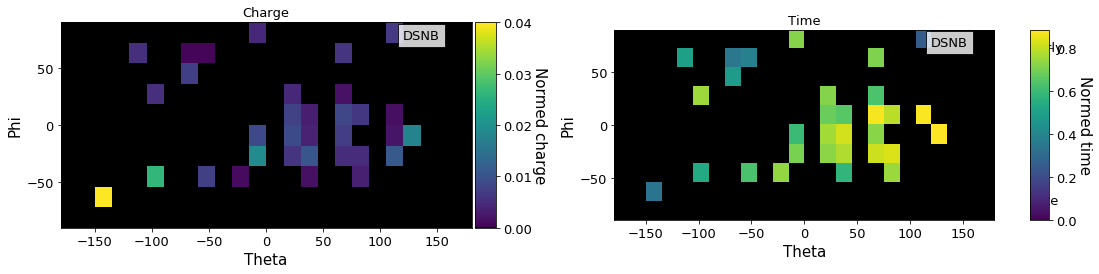

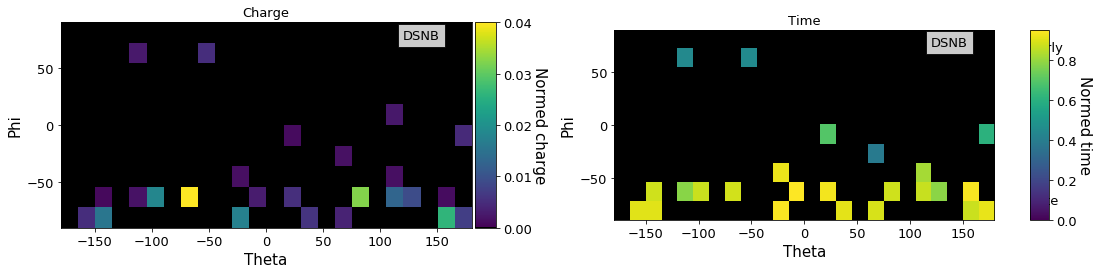

In [112]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=range(60,70,1)#130 im Normalen set           und  im Testset 48 DSNB #60 Atmo
for a in b:
    if (YTest[a] == (1,0)).all():
        Title="DSNB"
        
        pass
        #print(Title)
    else:
        Title="Atmo"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(XTest[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(XTest[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.5)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Late') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Early')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)
#plt.savefig(Testbilder.pdf)

conv2d (3, 3, 2, 100)


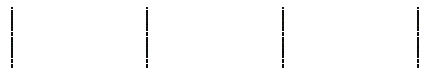

In [84]:
#summarize filter shapes
plt.subplots_adjust(wspace = 1.0 ,hspace = 1.0)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 100, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = plt.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    plt.show()
    
    break

In [85]:
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 50, 120, 2)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 120, 100)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 120, 100)      90100     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 60, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 60, 100)       901

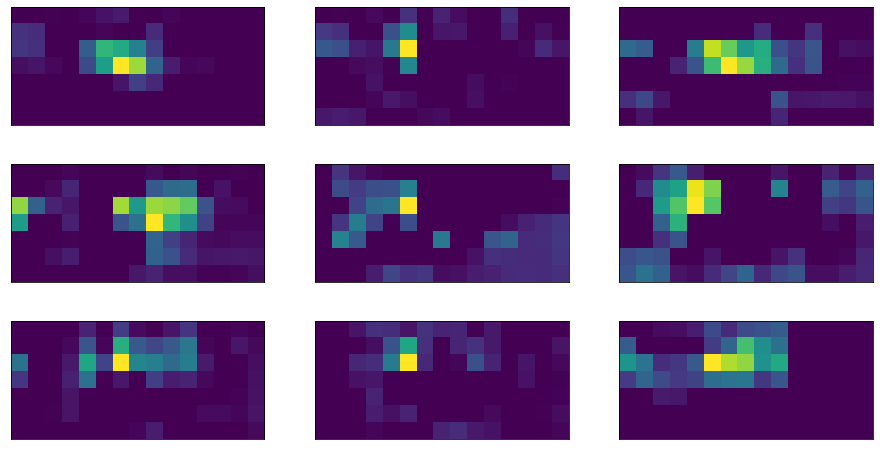

In [115]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_window_tf_PID_70k_tf-improvement-val-acc_0.97.model")





ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[15].output)#10

model.summary()





# get feature map for first hidden layer
feature_maps2 = model.predict(XTest[60:61])
print(feature_maps2.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=9
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(3, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps2[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
pyplot.savefig("PMT layer0 ALL Conv DSNB.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 50, 120, 2)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 120, 100)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 120, 100)      90100     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 60, 100)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 60, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 25, 60, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 60, 100)       901

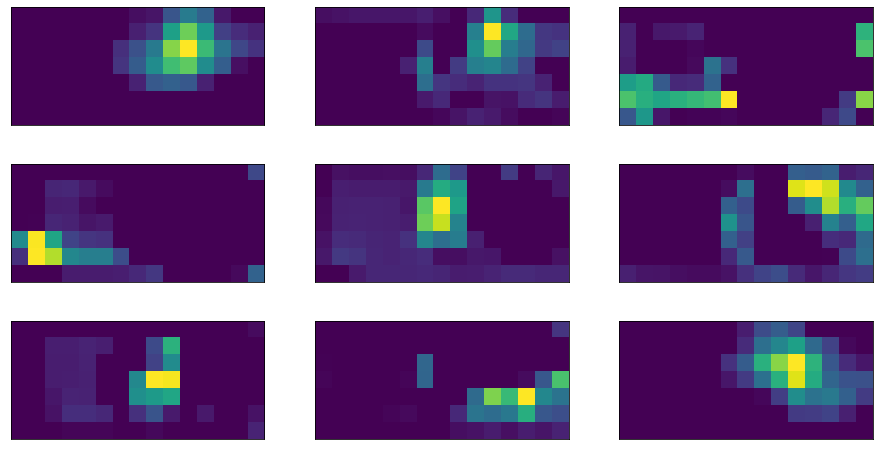

In [116]:
model = tf.keras.models.load_model("CNN_PMT+LAPPD(5x5)_window_tf_PID_70k_tf-improvement-val-acc_0.97.model")





ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[15].output)#10

model.summary()





# get feature map for first hidden layer
feature_maps2 = model.predict(XTest[48:49])
print(feature_maps2.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=9
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(3, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps2[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
pyplot.savefig("PMT layer0 ALL Conv DSNB.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()


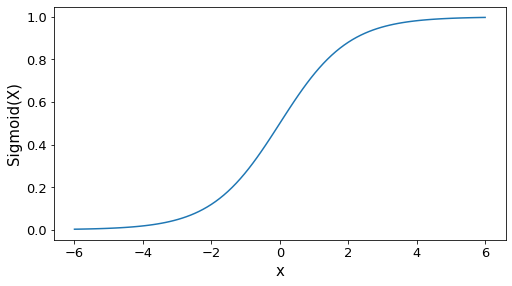

In [122]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
plt.rcParams['figure.figsize'] = [17/2.1, 9/2.1]
x = np.linspace(-6, 6, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

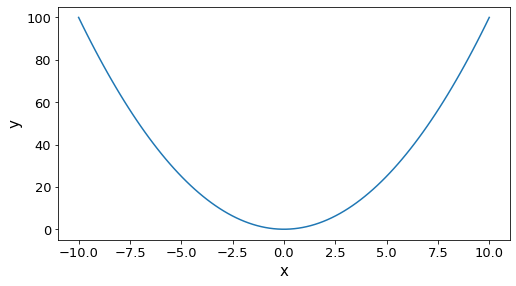

In [129]:
plt.rcParams['figure.figsize'] = [17/2.1, 9/2.1]
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, x**2) 
plt.xlabel("x") 
plt.ylabel("y") 
  
plt.show()

In [124]:
#ReLu functiondef relu(X):
def relu(X):
  
   return np.maximum(0,X)#Example with mmatrix defined above
relu(mmatrix)output:
array([[1, 2, 3],        [4, 5, 6]])

SyntaxError: invalid syntax (<ipython-input-124-4810d04c9745>, line 5)

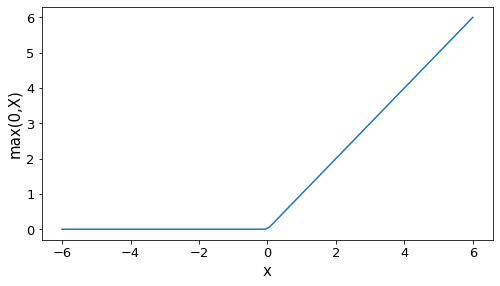

In [126]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
plt.rcParams['figure.figsize'] = [17/2.1, 9/2.1]
x = np.linspace(-6, 6, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, np.maximum(0,x)) 
plt.xlabel("x") 
plt.ylabel("max(0,X)") 
  
plt.show()